### In this notebook :
#### [] fills nan appropriately
#### [] drops columns :
##### - 'sofifa_id', 'url', 'long_name', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_positioning', 'gk_speed', 'nation_position', 'nation_jersey_number', 'team_jersey_number', 'loaned_from', 'dob', 'real_face', 'joined', 'player_tags', 'player_traits', 'body_type'.
#### [] Label Encodes the categorical values
#### [] Standard scaler applied to whole numeric data
#### [] Dimensionality reduction using PCA
#### [] Finds the optimal no. ok clusters using 
* * Elbow Method
* * Silhouette Score

#### [] Model initialisation and Training


In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder, StandardScaler,MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples,silhouette_score

from sklearn.model_selection import GridSearchCV

In [2]:
data = pd.read_csv('players_20.csv')


pd.pandas.set_option('display.max_columns',None)
pd.pandas.set_option('display.max_rows', None)

In [3]:
data.head(5)

sofifa_id                                         player_url  \
0     158023  https://sofifa.com/player/158023/lionel-messi/...   
1      20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
2     190871  https://sofifa.com/player/190871/neymar-da-sil...   
3     200389  https://sofifa.com/player/200389/jan-oblak/20/...   
4     183277  https://sofifa.com/player/183277/eden-hazard/2...   

          short_name                            long_name  age         dob  \
0           L. Messi       Lionel Andrés Messi Cuccittini   32  1987-06-24   
1  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   34  1985-02-05   
2          Neymar Jr        Neymar da Silva Santos Junior   27  1992-02-05   
3           J. Oblak                            Jan Oblak   26  1993-01-07   
4          E. Hazard                          Eden Hazard   28  1991-01-07   

   height_cm  weight_kg nationality                 club  overall  potential  \
0        170         72   Argentina         FC Barcelona       94         94   
1        187         83    Portugal             Juventus       93         93   
2        175         68      Brazil  Paris Saint-Germain       92         92   
3        188         87    Slovenia      Atlético Madrid       91         93   
4        175         74     Belgium          Real Madrid       91         91   

   value_eur  wage_eur player_positions preferred_foot  \
0   95500000    565000       RW, CF, ST           Left   
1   58500000    405000           ST, LW          Right   
2  105500000    290000          LW, CAM          Right   
3   77500000    125000               GK          Right   
4   90000000    470000           LW, CF          Right   

   international_reputation  weak_foot  skill_moves      work_rate  \
0                         5          4            4     Medium/Low   
1                         5          4            5       High/Low   
2                         5          5            5    High/Medium   
3                         3          3            1  Medium/Medium   
4                         4          4            4    High/Medium   

    body_type real_face  release_clause_eur  \
0       Messi       Yes         195800000.0   
1  C. Ronaldo       Yes          96500000.0   
2      Neymar       Yes         195200000.0   
3      Normal       Yes         164700000.0   
4      Normal       Yes         184500000.0   

                                         player_tags team_position  \
0  #Dribbler, #Distance Shooter, #Crosser, #FK Sp...            RW   
1  #Speedster, #Dribbler, #Distance Shooter, #Acr...            LW   
2  #Speedster, #Dribbler, #Playmaker  , #Crosser,...           CAM   
3                                                NaN            GK   
4                    #Speedster, #Dribbler, #Acrobat            LW   

   team_jersey_number loaned_from      joined  contract_valid_until  \
0                10.0         NaN  2004-07-01                2021.0   
1                 7.0         NaN  2018-07-10                2022.0   
2                10.0         NaN  2017-08-03                2022.0   
3                13.0         NaN  2014-07-16                2023.0   
4                 7.0         NaN  2019-07-01                2024.0   

  nation_position  nation_jersey_number  pace  shooting  passing  dribbling  \
0             NaN                   NaN  87.0      92.0     92.0       96.0   
1              LS                   7.0  90.0      93.0     82.0       89.0   
2              LW                  10.0  91.0      85.0     87.0       95.0   
3              GK                   1.0   NaN       NaN      NaN        NaN   
4              LF                  10.0  91.0      83.0     86.0       94.0   

   defending  physic  gk_diving  gk_handling  gk_kicking  gk_reflexes  \
0       39.0    66.0        NaN          NaN         NaN          NaN   
1       35.0    78.0        NaN          NaN         NaN          NaN   
2       32.0    58.0        NaN          NaN         Na

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Columns: 104 entries, sofifa_id to rb
dtypes: float64(16), int64(45), object(43)
memory usage: 14.5+ MB


In [5]:
data.describe()

sofifa_id           age     height_cm     weight_kg       overall  \
count   18278.000000  18278.000000  18278.000000  18278.000000  18278.000000   
mean   219738.864482     25.283291    181.362184     75.276343     66.244994   
std     27960.200461      4.656964      6.756961      7.047744      6.949953   
min       768.000000     16.000000    156.000000     50.000000     48.000000   
25%    204445.500000     22.000000    177.000000     70.000000     62.000000   
50%    226165.000000     25.000000    181.000000     75.000000     66.000000   
75%    240795.750000     29.000000    186.000000     80.000000     71.000000   
max    252905.000000     42.000000    205.000000    110.000000     94.000000   

          potential     value_eur       wage_eur  international_reputation  \
count  18278.000000  1.827800e+04   18278.000000              18278.000000   
mean      71.546887  2.484038e+06    9456.942773                  1.103184   
std        6.139669  5.585481e+06   21351.714095                  0.378861   
min       49.000000  0.000000e+00       0.000000                  1.000000   
25%       67.000000  3.250000e+05    1000.000000                  1.000000   
50%       71.000000  7.000000e+05    3000.000000                  1.000000   
75%       75.000000  2.100000e+06    8000.000000                  1.000000   
max       95.000000  1.055000e+08  565000.000000                  5.000000   

          weak_foot   skill_moves  release_clause_eur  team_jersey_number  \
count  18278.000000  18278.000000        1.698000e+04        18038.000000   
mean       2.944250      2.368038        4.740717e+06           20.103892   
std        0.664656      0.765038        1.103002e+07           16.603639   
min        1.000000      1.000000        1.300000e+04            1.000000   
25%        3.000000      2.000000        5.630000e+05            9.000000   
50%        3.000000      2.000000        1.200000e+06           17.000000   
75%        3.000000      3.000000        3.700000e+06           27.000000   
max        5.000000      5.000000        1.958000e+08           99.000000   

       contract_valid_until  nation_jersey_number          pace      shooting  \
count          18038.000000           1126.000000  16242.000000  16242.000000   
mean            2021.114591             12.114565     67.700899     52.298301   
std                1.289888              6.735922     11.297656     14.029418   
min             2019.000000              1.000000     24.000000     15.000000   
25%             2020.000000              6.000000     61.000000     42.000000   
50%             2021.000000             12.000000     69.000000     54.000000   
75%             2022.000000             18.000000     75.000000     63.000000   
max             2026.000000             30.000000     96.000000     93.000000   

            passing     dribbling     defending        physic    gk_diving  \
count  16242.000000  16242.000000  16242.000000  16242.000000  2036.000000   
mean      57.233777     62.531585     51.553503     64.876678    65.422397   
std       10.407844     10.284950     16.419528      9.760162     7.736278   
min       24.000000     23.000000     15.000000     27.000000    44.000000   
25%       50.000000     57.000000     36.000000     59.000000    60.000000   
50%       58.000000     64.000000     56.000000     66.000000    65.000000   
75%       64.000000     69.000000     65.000000     72.000000    70.000000   
max       92.000000     96.000000     90.000000     90.000000    90.000000   

       gk_handling   gk_kicking  gk_reflexes     gk_speed  gk_positioning  \
count  2036.000000  2036.000000  2036.000000  2036.000000     2036.000000   
mean     63.146365    61.832515    66.390472    37.798625       63.374754   
std       7.244023     7.510709     8.154062    10.634038        8.447876   
min      42.000000    35.000000    45.000000    12.000000       41.000000   
25%      58.000000    57.000000    60.750000    29.000000       58.000000  

In [6]:
data.describe(include=object)

player_url    short_name  \
count                                               18278         18278   
unique                                              18278         17354   
top     https://sofifa.com/player/225100/joe-gomez/20/...  J. Rodríguez   
freq                                                    1            11   

         long_name         dob nationality         club player_positions  \
count        18278       18278       18278        18278            18278   
unique       18218        6142         162          698              643   
top     Liam Kelly  1992-02-29     England  Southampton               CB   
freq             3         113        1667           33             2322   

       preferred_foot      work_rate body_type real_face player_tags  \
count           18278          18278     18278     18278        1499   
unique              2              9        10         2          83   
top             Right  Medium/Medium    Normal        No   #Strength   
freq            13960           9875     10750     16310         514   

       team_position loaned_from      joined nation_position  player_traits  \
count          18038        1048       16990            1126           7566   
unique            29         316        1760              26            921   
top              SUB    Atalanta  2019-07-01             SUB  Early Crosser   
freq            7820          17        1465             587            501   

           ls     st     rs     lw     lf     cf     rf     rw    lam    cam  \
count   16242  16242  16242  16242  16242  16242  16242  16242  16242  16242   
unique     94     94     94    107    103    103    103    107    103    103   
top      61+2   61+2   61+2   63+2   63+2   63+2   63+2   63+2   61+2   61+2   
freq      725    725    725    736    727    727    727    736    748    748   

          ram     lm    lcm     cm    rcm     rm    lwb    ldm    cdm    rdm  \
count   16242  16242  16242  16242  16242  16242  16242  16242  16242  16242   
unique    103    100     88     88     88    100     98     98     98     98   
top      61+2   61+2   58+2   58+2   58+2   61+2   59+2   59+2   59+2   59+2   
freq      748    809    775    775    775    809    682    636    636    636   

          rwb     lb    lcb     cb    rcb     rb  
count   16242  16242  16242  16242  16242  16242  
unique     98     96    110    110    110     96  
top      59+2   61+2   63+2   63+2   63+2   61+2  
freq      682    667    621    621    621    667

In [7]:
def list_null(df):
    i=0
    j=0
    column = np.array(df.columns)
    print("Null Values \n")
    for i in range (0,len(df.columns)):
        null = df.iloc[:,i].isnull()
        if(null.sum()!=0):
            percent = (null.sum())/(null.count())
            print("{:20} :\t {} \t {:0.2f}%\t null values".format(column[i],null.sum(),percent*100))
        else:
            j=j+1
    if(j==len(df.columns)):
        print('None')

In [8]:
list_null(data)

Null Values 

release_clause_eur   :	 1298 	 7.10%	 null values
player_tags          :	 16779 	 91.80%	 null values
team_position        :	 240 	 1.31%	 null values
team_jersey_number   :	 240 	 1.31%	 null values
loaned_from          :	 17230 	 94.27%	 null values
joined               :	 1288 	 7.05%	 null values
contract_valid_until :	 240 	 1.31%	 null values
nation_position      :	 17152 	 93.84%	 null values
nation_jersey_number :	 17152 	 93.84%	 null values
pace                 :	 2036 	 11.14%	 null values
shooting             :	 2036 	 11.14%	 null values
passing              :	 2036 	 11.14%	 null values
dribbling            :	 2036 	 11.14%	 null values
defending            :	 2036 	 11.14%	 null values
physic               :	 2036 	 11.14%	 null values
gk_diving            :	 16242 	 88.86%	 null values
gk_handling          :	 16242 	 88.86%	 null values
gk_kicking           :	 16242 	 88.86%	 null values
gk_reflexes          :	 16242 	 88.86%	 null values
gk_speed         

In [9]:
# Finding duplicate rows if any

data.duplicated().any()

False

In [10]:
# Finding duplicate columns if any and dropping them  

duplicate_columns = set()

for i in range(data.shape[1]):
    for j in range(i+1,data.shape[1]):
        if (data[data.columns[i]].equals(data[data.columns[j]])):
            duplicate_columns.add(data.columns[j])

print(list(duplicate_columns))

data.drop(columns=list(duplicate_columns),inplace=True)

['rdm', 'rwb', 'rcb', 'rb', 'rf', 'rm', 'cf', 'cm', 'cdm', 'st', 'rcm', 'rw', 'cb', 'cam', 'rs', 'ram']


In [11]:
# Let's make a copy of the dataset before modifying further so we can use it to identify our clusters later

original_data = data.copy()

In [12]:
d_GK = data[data.player_positions=='GK']
d_GK.head()

sofifa_id                                         player_url  \
3      200389  https://sofifa.com/player/200389/jan-oblak/20/...   
6      192448  https://sofifa.com/player/192448/marc-andre-te...   
13     212831  https://sofifa.com/player/212831/alisson-ramse...   
14     193080  https://sofifa.com/player/193080/david-de-gea-...   
25     210257  https://sofifa.com/player/210257/ederson-santa...   

       short_name                  long_name  age         dob  height_cm  \
3        J. Oblak                  Jan Oblak   26  1993-01-07        188   
6   M. ter Stegen      Marc-André ter Stegen   27  1992-04-30        187   
13        Alisson      Alisson Ramses Becker   26  1992-10-02        191   
14         De Gea      David De Gea Quintana   28  1990-11-07        192   
25        Ederson  Ederson Santana de Moraes   25  1993-08-17        188   

    weight_kg nationality               club  overall  potential  value_eur  \
3          87    Slovenia    Atlético Madrid       91         93   77500000   
6          85     Germany       FC Barcelona       90         93   67500000   
13         91      Brazil          Liverpool       89         91   58000000   
14         82       Spain  Manchester United       89         90   56000000   
25         86      Brazil    Manchester City       88         91   54500000   

    wage_eur player_positions preferred_foot  international_reputation  \
3     125000               GK          Right                         3   
6     250000               GK          Right                         3   
13    155000               GK          Right                         3   
14    205000               GK          Right                         4   
25    185000               GK           Left                         2   

    weak_foot  skill_moves      work_rate body_type real_face  \
3           3            1  Medium/Medium    Normal       Yes   
6           4            1  Medium/Medium    Normal       Yes   
13          3            1  Medium/Medium    Normal       Yes   
14          3            1  Medium/Medium      Lean       Yes   
25          3            1  Medium/Medium    Normal       Yes   

    release_clause_eur player_tags team_position  team_jersey_number  \
3          164700000.0         NaN            GK                13.0   
6          143400000.0         NaN            GK                 1.0   
13         111700000.0         NaN            GK                 1.0   
14         110600000.0         NaN            GK                 1.0   
25         104900000.0         NaN            GK                31.0   

   loaned_from      joined  contract_valid_until nation_position  \
3          NaN  2014-07-16                2023.0              GK   
6          NaN  2014-07-01                2022.0             SUB   
13         NaN  2018-07-19                2024.0             NaN   
14         NaN  2011-07-01                2020.0              GK   
25         NaN  2017-07-01                2024.0             NaN   

    nation_jersey_number  pace  shooting  passing  dribbling  defending  \
3                    1.0   NaN       NaN      NaN        NaN        NaN   
6                   22.0   NaN       NaN      NaN        NaN        NaN   
13                   NaN   NaN       NaN      NaN        NaN        NaN   
14                   1.0   NaN       NaN      NaN        NaN        NaN   
25                   NaN   NaN       NaN      NaN        NaN        NaN   

    physic  gk_diving  gk_handling  gk_kicking  gk_reflexes  gk_speed  \
3      NaN       87.0         92.0        78.0         89.0      52.0   
6      NaN       88.0         85.0        88.0         90.0      45.0   
13     NaN       85.0         84.0        85.0         89.0      51.0   
14     NaN       90.0         84.0        81.0         92.0      58.0   
25     NaN       86.0         82.0        93.0         88.0      63.0   

    gk_positioning                                   player_traits  \
3             90.0       

In [13]:
d_GK.loc[:,['gk_speed','pace']]

gk_speed  pace
3          52.0   NaN
6          45.0   NaN
13         51.0   NaN
14         58.0   NaN
25         63.0   NaN
28         49.0   NaN
30         53.0   NaN
31         57.0   NaN
32         63.0   NaN
53         53.0   NaN
60         49.0   NaN
74         50.0   NaN
86         64.0   NaN
87         43.0   NaN
88         50.0   NaN
91         54.0   NaN
111        33.0   NaN
122        56.0   NaN
125        36.0   NaN
130        48.0   NaN
131        51.0   NaN
137        51.0   NaN
167        49.0   NaN
181        48.0   NaN
184        45.0   NaN
193        49.0   NaN
196        52.0   NaN
200        33.0   NaN
201        55.0   NaN
202        43.0   NaN
206        58.0   NaN
211        55.0   NaN
223        41.0   NaN
242        44.0   NaN
248        63.0   NaN
250        55.0   NaN
251        56.0   NaN
257        42.0   NaN
264        45.0   NaN
267        41.0   NaN
268        56.0   NaN
272        49.0   NaN
286        57.0   NaN
293        48.0   NaN
294        32.0   NaN
324        42.0   NaN
333        39.0   NaN
342        51.0   NaN
351        48.0   NaN
364        65.0   NaN
365        37.0   NaN
376        40.0   NaN
386        55.0   NaN
388        61.0   NaN
415        46.0   NaN
427        50.0   NaN
431        43.0   NaN
456        44.0   NaN
460        48.0   NaN
466        50.0   NaN
467        52.0   NaN
485        46.0   NaN
486        37.0   NaN
489        39.0   NaN
492        44.0   NaN
493        50.0   NaN
496        51.0   NaN
498        49.0   NaN
499        55.0   NaN
500        48.0   NaN
508        45.0   NaN
511        34.0   NaN
518        43.0   NaN
537        53.0   NaN
558        40.0   NaN
565        42.0   NaN
572        46.0   NaN
627        54.0   NaN
628        48.0   NaN
648        56.0   NaN
667        43.0   NaN
682        52.0   NaN
697        40.0   NaN
704        52.0   NaN
714        43.0   NaN
725        44.0   NaN
747        60.0   NaN
751        60.0   NaN
753        45.0   NaN
782        56.0   NaN
792        44.0   NaN
807        45.0   NaN
808        41.0   NaN
814        36.0   NaN
842        48.0   NaN
850        37.0   NaN
861        49.0   NaN
865        56.0   NaN
875        35.0   NaN
887        51.0   NaN
899        39.0   NaN
907        39.0   NaN
915        48.0   NaN
933        44.0   NaN
955        51.0   NaN
967        36.0   NaN
981        37.0   NaN
983        45.0   NaN
993        52.0   NaN
1019       29.0   NaN
1072       52.0   NaN
1074       41.0   NaN
1090       34.0   NaN
1094       46.0   NaN
1099       45.0   NaN
1101       47.0   NaN
1111       49.0   NaN
1124       35.0   NaN
1130       50.0   NaN
1134       44.0   NaN
1136       50.0   NaN
1138       58.0   NaN
1157       56.0   NaN
1161       45.0   NaN
1174       47.0   NaN
1186       37.0   NaN
1217       41.0   NaN
1234       45.0   NaN
1240       43.0   NaN
1257       29.0   NaN
1283       47.0   NaN
1287       43.0   NaN
1292       53.0   NaN
1300       53.0   NaN
1302       49.0   NaN
1316       55.0   NaN
1328       42.0   NaN
1346       46.0   NaN
1357       55.0   NaN
1372       46.0   NaN
1373       49.0   NaN
1374       46.0   NaN
1385       51.0   NaN
1386       36.0   NaN
1389       33.0   NaN
1394       58.0   NaN
1396       57.0   NaN
1398       52.0   NaN
1403       38.0   NaN
1421       47.0   NaN
1429       46.0   NaN
1435       49.0   NaN
1450       43.0   NaN
1453       60.0   NaN
1458       37.0   NaN
1460       57.0   NaN
1480       56.0   NaN
1490       40.0   NaN
1518       28.0   NaN
1532       38.0   NaN
1542       45.0   NaN
1592       39.0   NaN
1597       32.0   NaN
1598       52.0   NaN
1605       48.0   NaN
1616       40.0   NaN
1628       47.0   NaN
1630       49.0   NaN
1646       43.0   NaN
1660       44.0   NaN
1718       58.0   NaN
1722       41.0   NaN
1743       49.0   NaN
1752       36.0   NaN
1763       51.0   NaN
1782       42.0   NaN
1786       64.0   NaN
1812       48.0   NaN
1819       34.0   NaN
1821       52.0   NaN
1832       45.0   NaN
183

In [14]:
# Finds whether the columns specified have same values or not

duplicate_columns_GK = set()

for i in range(d_GK.shape[1]):
    for j in range(i+1,d_GK.shape[1]):
        if (d_GK.iloc[:,i]== d_GK.iloc[:,j]).all():
            duplicate_columns_GK.add(d_GK.columns[i])

print(list(duplicate_columns_GK))




['gk_kicking', 'gk_diving', 'gk_handling', 'gk_positioning', 'gk_reflexes']


In [15]:
list_null(d_GK)

Null Values 

release_clause_eur   :	 133 	 6.53%	 null values
player_tags          :	 2036 	 100.00%	 null values
team_position        :	 40 	 1.96%	 null values
team_jersey_number   :	 40 	 1.96%	 null values
loaned_from          :	 1943 	 95.43%	 null values
joined               :	 133 	 6.53%	 null values
contract_valid_until :	 40 	 1.96%	 null values
nation_position      :	 1889 	 92.78%	 null values
nation_jersey_number :	 1889 	 92.78%	 null values
pace                 :	 2036 	 100.00%	 null values
shooting             :	 2036 	 100.00%	 null values
passing              :	 2036 	 100.00%	 null values
dribbling            :	 2036 	 100.00%	 null values
defending            :	 2036 	 100.00%	 null values
physic               :	 2036 	 100.00%	 null values
player_traits        :	 1372 	 67.39%	 null values
ls                   :	 2036 	 100.00%	 null values
lw                   :	 2036 	 100.00%	 null values
lf                   :	 2036 	 100.00%	 null values
lam                 


* 'gk_diving','gk_handling','gk_kicking','gk_reflexes','gk_positioning'  can be dropped as their values are already present in other columns.
* 'gk_speed' can be transferred to the nan values in 'pace' and then dropped.
* all the null values in the last 10 columns are corresponding to the GK, hence can be filled with 0.

* 'shooting','passing','dribbling','defending','physic'  have 100% null values for GK and hence be filled with 0.


In [16]:
# copying the elements in gk_speed into pace
d_GK.pace=d_GK.gk_speed.copy()

In [17]:
# col is the variable that hold the name of the columns that has 100% null values for the GK dataframe

col = list(d_GK.columns[np.where(d_GK.isnull().sum()==d_GK.shape[0])])
col.remove('player_tags')

d_GK[col] = d_GK[col].fillna(value=0,axis=1)

###### The modified data is transferred back to the main dataset

In [18]:
data[data.player_positions=='GK']=d_GK

In [19]:
dropcol = ['gk_diving','gk_handling','gk_kicking','gk_reflexes','gk_positioning','gk_speed',
           'sofifa_id','player_url','long_name','dob','real_face','body_type']

data.drop(dropcol,axis=1,inplace=True)

In [20]:
list(data.columns[-10:])

['ls', 'lw', 'lf', 'lam', 'lm', 'lcm', 'lwb', 'ldm', 'lb', 'lcb']

In [21]:
# For changing the values in the columns to integers

cols = ['ls', 'lw', 'lf', 'lam', 'lm', 'lcm', 'lwb', 'ldm', 'lb', 'lcb']

for i in cols:
    for j in range(len(data[i])):
        if type(data.loc[j,i])==str:
            s = data.loc[j,i].split('+')
            s1 = int(s[0])+int(s[1])
            data.loc[j,i]=s1
        


In [22]:
data[cols]=data[cols].apply(pd.to_numeric,errors='coerce',axis=1)

In [23]:
data.preferred_foot= data.preferred_foot.map({'Left': 0 , 'Right': 1})

In [24]:
data.team_position.fillna(value=data.nation_position,inplace=True)

In [25]:
nation_present = [x for x in np.zeros(18278,dtype=int)]

ind = data.columns.get_loc('nation_position')

data.insert(ind,'nation_present',value=nation_present)

In [26]:
data.loc[data.nation_position.notna(),'nation_present']=1

In [27]:
data.drop(columns=['nation_position','nation_jersey_number','team_jersey_number','loaned_from'],inplace=True)

In [28]:
data.release_clause_eur.fillna(value=data.value_eur*2,inplace=True)

In [29]:
data.joined.fillna(value=data.joined.mode()[0],inplace=True)

In [30]:
data.joined = pd.to_datetime(data.joined,format='%Y-%m-%d')

In [31]:
date = pd.DatetimeIndex(data.joined).day
month = pd.DatetimeIndex(data.joined).month
year = pd.DatetimeIndex(data.joined).year

In [32]:
ind = data.columns.get_loc('joined')

data.insert(ind,'joined_date',date)
data.insert(ind,'joined_month',month)
data.insert(ind,'joined_year',year)

In [33]:
data.drop(columns='joined',inplace=True)

In [34]:
data.contract_valid_until.fillna(value=(data.contract_valid_until.median()),inplace=True)

In [35]:
#removing any leading or trailing blanks in the player_positions column values

pp = data.player_positions
s=','
for j in range(len(pp)):
    p=(pp[j]).split(',')
    for i in range (len(p)):
        p[i] = p[i].strip()
    pp[j]=s.join(p)
    

In [36]:
# removing trailing blanks in the player_tag 

data.player_tags = data.player_tags.str.rstrip()

# Function to assign the tag

def player_skill_group(df):
    defender = ['LS','ST','RS','LW','CF','RW','LWB','RWB','LB','LCB','CB','RCB','RB']
    set_defender =set(defender)
    
    midfielder = ['LAM','CAM','RAM','LDM','CDM','RDM']
    set_midfielder =set(midfielder)

    forward = ['LM','LCM','CM','RCM','RM']
    set_forward = set(forward)

    tag = ''
    comma=', '
    if df['dribbling']>85 and df['movement_balance']>74 or df['skill_dribbling']>85:
        tag = '#Dribbler'

    if df['movement_acceleration'] >89 and df['movement_sprint_speed']>89 or df['pace'] > 89:
        tag = comma.join([tag,'#Speedster'])

    if (df['defending_standing_tackle']>85 and df['defending_sliding_tackle']>84):
        tag = comma.join([tag,"#Tackling"])
        
    if df['power_stamina']> 85 and df['work_rate']=='High/High':
        tag = comma.join([tag,"#Engine"])
        
    if df['attacking_heading_accuracy']> 74 and df['power_jumping']>84 and df['power_strength']>84 and df['height_cm']>187:
        tag = comma.join([tag, "#Aerial Threat"])
        
    if df['power_long_shots']> 86 and df['power_shot_power']>86:
        tag = comma.join([tag,"#Distance Shooter"])
    
    if df['attacking_finishing']> 85 and df['mentality_positioning']> 79:
        tag = comma.join([tag,"#Clinical Finisher"])
    
    if df['passing']> 80 and df['attacking_short_passing']>85 and df['mentality_vision']>85 and df['skill_long_passing']>72:
        tag = comma.join([tag,"#Playmaker"])
    
    if df['attacking_finishing']>84 and df['attacking_heading_accuracy']>84 and df['work_rate']=='Low/Medium':
        tag = comma.join([tag, "#Poacher"])   
    
    if df['movement_reactions']>79 and df['mentality_interceptions']>85 :
        tag = comma.join([tag, "#Tactician"]) 
    
    if df['attacking_crossing']> 85 and df['skill_curve']>79 :
        tag = comma.join([tag, "#Crosser"]) 
    
    if df['movement_agility']>85 and df['movement_reactions']>79 and df['movement_balance']>80:
        tag = comma.join([tag, "#Acrobat"]) 
    
    if df['physic']> 80 and df['power_strength']>85 and df['weight_kg']>82:
        tag = comma.join([tag,"#Strength"]) 
    
    if df['skill_fk_accuracy']> 85 and df['skill_curve']>84 and df['power_shot_power'] > 84:
        tag = comma.join([tag,"#FK Specialist"])
    
    if (tag.find('#Poacher')>0 or tag.find('#Clinical Finisher')>0)and(tag.find('#Speedster')>0 or tag.find('#Aerial Threat')>0 or tag.find('#Dribbler')>=0 or tag.find('#Strength')>0):
        tag = comma.join([tag,"#Complete Forward"])

    if (tag.find('#Playmaker')>0 )and(tag.find('#Engine')>0 or tag.find('#Crosser')>0 or tag.find('#Dribbler')>=0 or tag.find('#FK Specialist')>0 or tag.find('#Clinical Finisher')>0 or tag.find('#Tackler')>0):
        tag = comma.join([tag,"#Complete Midfielder"]) 
    
    if (tag.find('#Tackling')>0 )and(tag.find('#Acrobat')>0 or tag.find('#Strength')>0 or tag.find('#Aerial Threat')>0 ):
        tag = comma.join([tag,"#Complete Defender"])
    
    if tag =='':
        if df['team_position'] =='GK' or df['player_positions']=='GK':
            tag = '#GK'
        else:
            set_holding_variable = {}
            temp_value = df['player_positions']
            holding_variable = temp_value.split(',')
            set_holding_variable =set(holding_variable)
            if len(set.intersection(set_holding_variable, set_defender))>0:
                tag = '#Defender'
            if len(set.intersection(set_holding_variable, set_midfielder))>0:
                tag = '#Midfielder'
            if len(set.intersection(set_holding_variable, set_forward))>0:
                tag = '#Forward'        
              
    return(tag.lstrip(comma))

In [37]:
for i in range(len(data['player_tags'])):
    if pd.isnull(data.loc[i,'player_tags']):
        data.loc[i,'player_tags']= player_skill_group(data.loc[i])

In [38]:
# Chechking to see all null values for player_tags have been handled.
data['player_tags'].isnull().any()

False

In [39]:
data.player_traits.mode()

0    Early Crosser
dtype: object

In [40]:
data.player_traits.fillna(value=data.player_traits.mode()[0],inplace=True)

- As all of the data cleansing is done, we have to proceed to modelling.

<AxesSubplot:xlabel='preferred_foot', ylabel='count'>

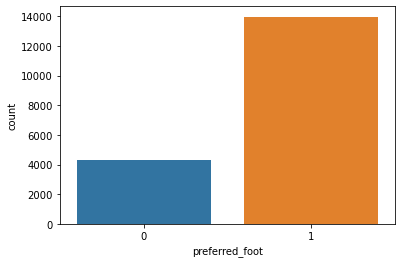

In [41]:
sns.countplot(data.preferred_foot)

Around 78% of the players are right-footed

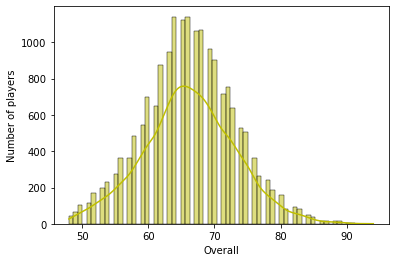

In [42]:
sns.histplot(data.overall,kde=True,color='y')
plt.xlabel('Overall')
plt.ylabel('Number of players')
plt.show()

the histogram of overall shows that most of the players have an overall of 65 to 7

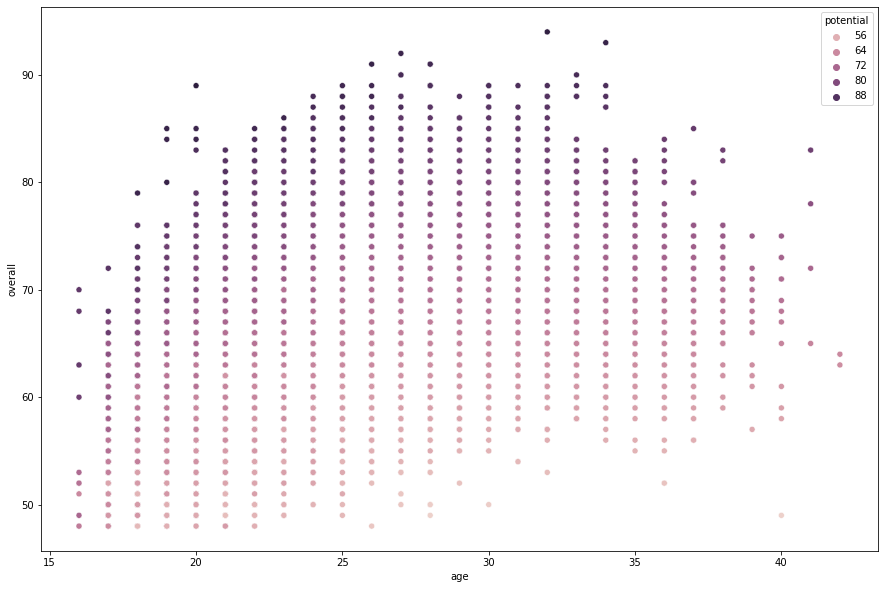

In [136]:
plt.figure(figsize=(15,10))
sns.scatterplot('age','overall',hue='potential',data=data)

plt.show()

The graph depicts a high correlation between the the overall and the potential features of the player. It can also be seen that there is a peak in the age group of 25 to 35.


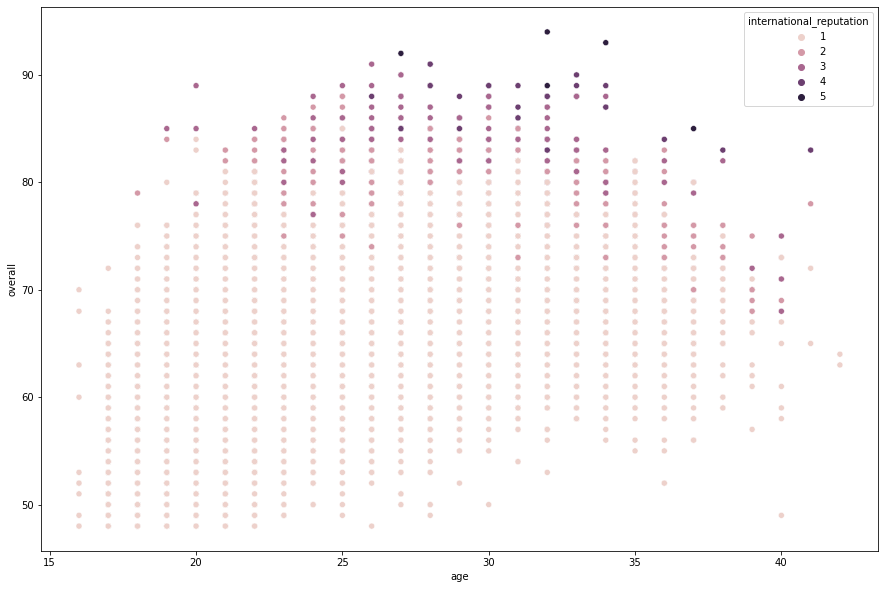

In [44]:
plt.figure(figsize=(15,10))
sns.scatterplot('age','overall',hue='international_reputation',data=data)

plt.show()

In [45]:
# Taking only the first element in player_position

data.player_positions = data.player_positions.str.split(',').str[0]
    

In [46]:
data.loc[:,['player_positions','team_position']]

player_positions team_position
0                   RW            RW
1                   ST            LW
2                   LW           CAM
3                   GK            GK
4                   LW            LW
5                  CAM           RCM
6                   GK            GK
7                   CB           LCB
8                   CM           RCM
9                   RW            RW
10                  ST            RW
11                  CB           LCB
12                  ST            ST
13                  GK            GK
14                  GK            GK
15                 CDM           RCM
16                  CB           LCB
17                  ST            ST
18                  CB           LCB
19                  ST            ST
20                  ST            ST
21                 CDM           CDM
22                  CF            LW
23                 CAM            RW
24                  CM           LDM
25                  GK            GK
26                  RW            LW
27                 CAM            RM
28                  GK            GK
29                  CB           RCB
30                  GK            GK
31                  GK            GK
32                  GK            GK
33                 CAM           LCM
34                  ST            ST
35                  CB           RCB
36                  CM           LCM
37                 CAM           CAM
38                  ST            LM
39                  LW            LW
40                  CB           LCB
41                  RW            RW
42                 CDM           CDM
43                  CF            LM
44                 CDM           CDM
45                  CB           LCB
46                  CF            CF
47                  CB           LCB
48                  CF           SUB
49                  CB           LCB
50                  CB           RCB
51                  LB            LB
52                  CM           CDM
53                  GK           SUB
54                  CF            LS
55                  LW           SUB
56                  CB           RCB
57                  CB           LCB
58                  CM           RCM
59                  CB           SUB
60                  GK            GK
61                  RB            RB
62                 CAM           SUB
63                  CF            CF
64                  CM           RCM
65                  CM           CDM
66                  RW            LW
67                  CB           RCB
68                  LW           LCM
69                  CM           RCM
70                 CAM           SUB
71                  ST            ST
72                  ST            ST
73                  CB           SUB
74                  GK            GK
75                  CM           LCM
76                  CB           RCB
77                  CB           RCB
78                  CM           RDM
79                 CDM           SUB
80                  CM           LCM
81                 CDM           CDM
82                  LB            LB
83                  CB           RCB
84                  CB           LCB
85                 CAM           RCM
86                  GK            GK
87                  GK            GK
88                  GK            GK
89                  ST            LS
90                  CB           RCB
91                  GK           SUB
92                  LB            LB
93                  ST           RES
94                  RB            RB
95                 CAM           RAM
96                  ST            ST
97                 CAM           CAM
98                  ST           SUB
99                 CDM           SUB
100                 RW           SUB
101                 LB            LB
102                CDM           LDM
103                 LB            LB
104                 ST            RS
105                 RM            RM
106                CAM           SUB
107       

<AxesSubplot:xlabel='player_positions', ylabel='count'>

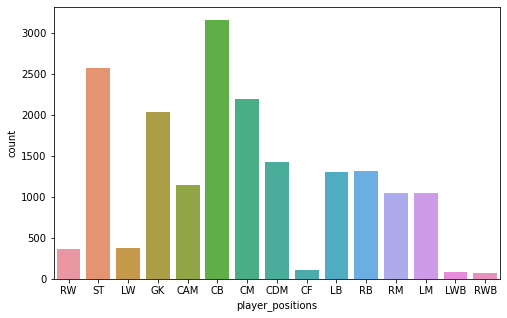

In [47]:
plt.figure(figsize=(8,5))
sns.countplot(data.player_positions)

most of the players in the data Central-Back or Central-Defender players. Strikers are second in number and then comes the Central-Midfielders.  

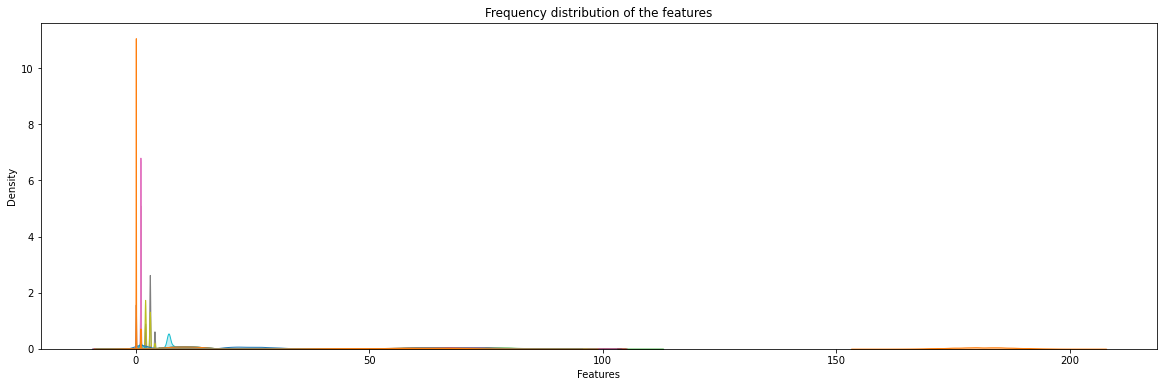

In [48]:
numeric_col = list(data.select_dtypes(exclude=object).columns)
numeric_col.remove('value_eur')
numeric_col.remove('wage_eur')
numeric_col.remove('release_clause_eur')
numeric_col.remove('joined_year')
numeric_col.remove('contract_valid_until')
# the above features were removed from the list inorder to create a good visualization
plt.figure(figsize=(20,6))
for nc in numeric_col:
    sns.kdeplot(x=nc,data=data,shade=True)
plt.title('Frequency distribution of the features')
plt.xlabel('Features')
plt.show()

In [49]:
categorical_data = pd.DataFrame(data.select_dtypes(include= object))

In [50]:
categorical_data.head()

short_name nationality                 club player_positions  \
0           L. Messi   Argentina         FC Barcelona               RW   
1  Cristiano Ronaldo    Portugal             Juventus               ST   
2          Neymar Jr      Brazil  Paris Saint-Germain               LW   
3           J. Oblak    Slovenia      Atlético Madrid               GK   
4          E. Hazard     Belgium          Real Madrid               LW   

       work_rate                                        player_tags  \
0     Medium/Low  #Dribbler, #Distance Shooter, #Crosser, #FK Sp...   
1       High/Low  #Speedster, #Dribbler, #Distance Shooter, #Acr...   
2    High/Medium  #Speedster, #Dribbler, #Playmaker  , #Crosser,...   
3  Medium/Medium                                                #GK   
4    High/Medium                    #Speedster, #Dribbler, #Acrobat   

  team_position                                      player_traits  
0            RW  Beat Offside Trap, Argues with Officials, Earl...  
1            LW  Long Throw-in, Selfish, Argues with Officials,...  
2           CAM  Power Free-Kick, Injury Free, Selfish, Early C...  
3            GK                         Flair, Acrobatic Clearance  
4            LW  Beat Offside Trap, Selfish, Finesse Shot, Spee...

In [51]:
encode = LabelEncoder()

In [52]:
# The categorical feature names are stored in cat_columns as a list. The word 'short_name' is removed from the list 
# as it does not have to be encoded.

cat_columns =list(categorical_data.columns)
cat_columns.remove('short_name')

for c in cat_columns:
    categorical_data[c] = encode.fit_transform(categorical_data[c])

In [53]:
# Categorical data after encoding

categorical_data.head()

short_name  nationality  club  player_positions  work_rate  \
0           L. Messi            5   224                12          7   
1  Cristiano Ronaldo          121   350                14          1   
2          Neymar Jr           18   462                 8          2   
3           J. Oblak          133    63                 5          8   
4          E. Hazard           12   505                 8          2   

   player_tags  team_position  player_traits  
0           27             25            110  
1           77             14            685  
2           78              0            785  
3           55              5            332  
4           75             14            163

In [54]:
# The encoded categorical values are placed back into the main data set

data[categorical_data.columns] = categorical_data
data.head()

short_name  age  height_cm  weight_kg  nationality  club  overall  \
0           L. Messi   32        170         72            5   224       94   
1  Cristiano Ronaldo   34        187         83          121   350       93   
2          Neymar Jr   27        175         68           18   462       92   
3           J. Oblak   26        188         87          133    63       91   
4          E. Hazard   28        175         74           12   505       91   

   potential  value_eur  wage_eur  player_positions  preferred_foot  \
0         94   95500000    565000                12               0   
1         93   58500000    405000                14               1   
2         92  105500000    290000                 8               1   
3         93   77500000    125000                 5               1   
4         91   90000000    470000                 8               1   

   international_reputation  weak_foot  skill_moves  work_rate  \
0                         5          4            4          7   
1                         5          4            5          1   
2                         5          5            5          2   
3                         3          3            1          8   
4                         4          4            4          2   

   release_clause_eur  player_tags  team_position  joined_year  joined_month  \
0         195800000.0           27             25         2004             7   
1          96500000.0           77             14         2018             7   
2         195200000.0           78              0         2017             8   
3         164700000.0           55              5         2014             7   
4         184500000.0           75             14         2019             7   

   joined_date  contract_valid_until  nation_present  pace  shooting  passing  \
0            1                2021.0               0  87.0      92.0     92.0   
1           10                2022.0               1  90.0      93.0     82.0   
2            3                2022.0               1  91.0      85.0     87.0   
3           16                2023.0               1  52.0       0.0      0.0   
4            1                2024.0               1  91.0      83.0     86.0   

   dribbling  defending  physic  player_traits  attacking_crossing  \
0       96.0       39.0    66.0            110                  88   
1       89.0       35.0    78.0            685                  84   
2       95.0       32.0    58.0            785                  87   
3        0.0        0.0     0.0            332                  13   
4       94.0       35.0    66.0            163                  81   

   attacking_finishing  attacking_heading_accuracy  attacking_short_passing  \
0                   95                          70                       92   
1                   94                          89                       83   
2                   87                          62                       87   
3                   11                          15                       43   
4                   84                          61                       89   

   attacking_volleys  skill_dribbling  skill_curve  skill_fk_accuracy  \
0                 88               97           93                 94   
1                 87               89           81                 76   
2                 87               96           88                 87   
3                 13               12           13                 14   
4                 83               95           83                 79   

   skill_long_passing  skill_ball_control  movement_acceleration  \
0                  92                  96                     91   
1                  77                  92                     89   
2                  81                  95                     94   
3                  40                  30                     43   
4                  83                  94                     94   


In [55]:
# Let's seperate the numerical data for ease of scaling

numerical_data = pd.DataFrame(data.select_dtypes(exclude= object))
numerical_data.head()

age  height_cm  weight_kg  nationality  club  overall  potential  \
0   32        170         72            5   224       94         94   
1   34        187         83          121   350       93         93   
2   27        175         68           18   462       92         92   
3   26        188         87          133    63       91         93   
4   28        175         74           12   505       91         91   

   value_eur  wage_eur  player_positions  preferred_foot  \
0   95500000    565000                12               0   
1   58500000    405000                14               1   
2  105500000    290000                 8               1   
3   77500000    125000                 5               1   
4   90000000    470000                 8               1   

   international_reputation  weak_foot  skill_moves  work_rate  \
0                         5          4            4          7   
1                         5          4            5          1   
2                         5          5            5          2   
3                         3          3            1          8   
4                         4          4            4          2   

   release_clause_eur  player_tags  team_position  joined_year  joined_month  \
0         195800000.0           27             25         2004             7   
1          96500000.0           77             14         2018             7   
2         195200000.0           78              0         2017             8   
3         164700000.0           55              5         2014             7   
4         184500000.0           75             14         2019             7   

   joined_date  contract_valid_until  nation_present  pace  shooting  passing  \
0            1                2021.0               0  87.0      92.0     92.0   
1           10                2022.0               1  90.0      93.0     82.0   
2            3                2022.0               1  91.0      85.0     87.0   
3           16                2023.0               1  52.0       0.0      0.0   
4            1                2024.0               1  91.0      83.0     86.0   

   dribbling  defending  physic  player_traits  attacking_crossing  \
0       96.0       39.0    66.0            110                  88   
1       89.0       35.0    78.0            685                  84   
2       95.0       32.0    58.0            785                  87   
3        0.0        0.0     0.0            332                  13   
4       94.0       35.0    66.0            163                  81   

   attacking_finishing  attacking_heading_accuracy  attacking_short_passing  \
0                   95                          70                       92   
1                   94                          89                       83   
2                   87                          62                       87   
3                   11                          15                       43   
4                   84                          61                       89   

   attacking_volleys  skill_dribbling  skill_curve  skill_fk_accuracy  \
0                 88               97           93                 94   
1                 87               89           81                 76   
2                 87               96           88                 87   
3                 13               12           13                 14   
4                 83               95           83                 79   

   skill_long_passing  skill_ball_control  movement_acceleration  \
0                  92                  96                     91   
1                  77                  92                     89   
2                  81                  95                     94   
3                  40                  30                     43   
4                  83                  94                     94   

   movement_sprint_speed  movement_agility  movement_reactions  \
0                     84                

<AxesSubplot:>

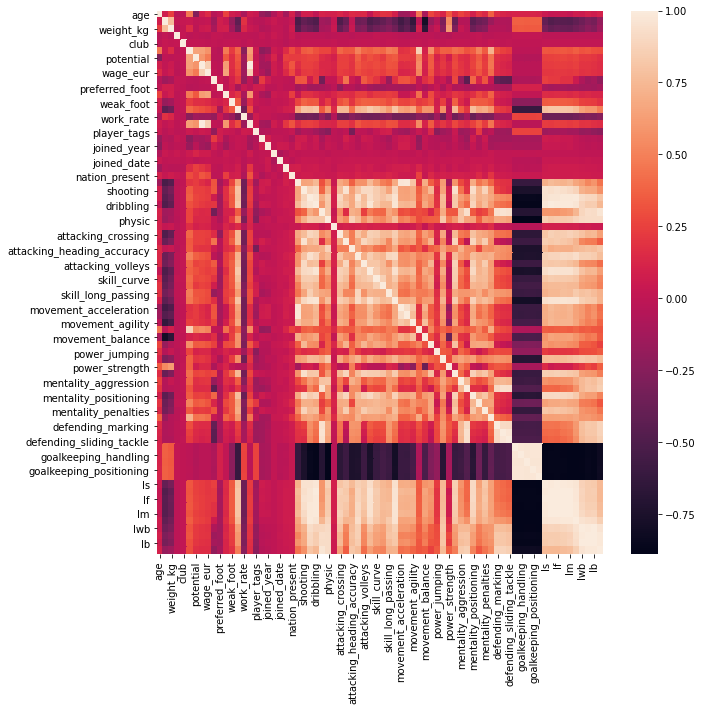

In [56]:
plt.figure(figsize=(10,10))
sns.heatmap(numerical_data.corr())

## Scaling
* the whole data is standardized using standard scaler

In [138]:
# Initialising the Standard Scaler

std = MinMaxScaler()

# The scaled dats are stored in a anew dataframe called new_data

new_data = pd.DataFrame(std.fit_transform(numerical_data),columns=list(numerical_data.columns))
new_data.head()

age  height_cm  weight_kg  nationality      club   overall  potential  \
0  0.615385   0.285714   0.366667     0.031056  0.321377  1.000000   0.978261   
1  0.692308   0.632653   0.550000     0.751553  0.502152  0.978261   0.956522   
2  0.423077   0.387755   0.300000     0.111801  0.662841  0.956522   0.934783   
3  0.384615   0.653061   0.616667     0.826087  0.090387  0.934783   0.956522   
4  0.461538   0.387755   0.400000     0.074534  0.724534  0.934783   0.913043   

   value_eur  wage_eur  player_positions  preferred_foot  \
0   0.905213  1.000000          0.857143             0.0   
1   0.554502  0.716814          1.000000             1.0   
2   1.000000  0.513274          0.571429             1.0   
3   0.734597  0.221239          0.357143             1.0   
4   0.853081  0.831858          0.571429             1.0   

   international_reputation  weak_foot  skill_moves  work_rate  \
0                      1.00       0.75         0.75      0.875   
1                      1.00       0.75         1.00      0.125   
2                      1.00       1.00         1.00      0.250   
3                      0.50       0.50         0.00      1.000   
4                      0.75       0.75         0.75      0.250   

   release_clause_eur  player_tags  team_position  joined_year  joined_month  \
0            1.000000     0.310345       0.892857     0.285714      0.545455   
1            0.492850     0.885057       0.500000     0.952381      0.545455   
2            0.996936     0.896552       0.000000     0.904762      0.636364   
3            0.841164     0.632184       0.178571     0.761905      0.545455   
4            0.942288     0.862069       0.500000     1.000000      0.545455   

   joined_date  contract_valid_until  nation_present      pace  shooting  \
0     0.000000              0.285714             0.0  0.892857  0.989247   
1     0.300000              0.428571             1.0  0.928571  1.000000   
2     0.066667              0.428571             1.0  0.940476  0.913978   
3     0.500000              0.571429             1.0  0.476190  0.000000   
4     0.000000              0.714286             1.0  0.940476  0.892473   

    passing  dribbling  defending    physic  player_traits  \
0  1.000000   1.000000   0.433333  0.733333       0.119565   
1  0.891304   0.927083   0.388889  0.866667       0.744565   
2  0.945652   0.989583   0.355556  0.644444       0.853261   
3  0.000000   0.000000   0.000000  0.000000       0.360870   
4  0.934783   0.979167   0.388889  0.733333       0.177174   

   attacking_crossing  attacking_finishing  attacking_heading_accuracy  \
0            0.943182             1.000000                    0.738636   
1            0.897727             0.989247                    0.954545   
2            0.931818             0.913978                    0.647727   
3            0.090909             0.096774                    0.113636   
4            0.863636             0.881720                    0.636364   

   attacking_short_passing  attacking_volleys  skill_dribbling  skill_curve  \
0                 1.000000           0.977011         1.000000     0.988636   
1                 0.894118           0.965517         0.913978     0.852273   
2                 0.941176           0.965517         0.989247     0.931818   
3                 0.423529           0.114943         0.086022     0.079545   
4                 0.964706           0.919540         0.978495     0.875000   

   skill_fk_accuracy  skill_long_passing  skill_ball_control  \
0           1.000000            1.000000            1.000000   
1           0.800000            0.821429            0.956044   
2           0.922222            0.869048            0.989011   
3           0.111111            0.380952            0.274725   
4           0.833333            0.892857            0.978022   

   movement_acceleration  movement_sprint_speed  movement_agility  \
0               0.929412               0.858824          0.964706   
1        

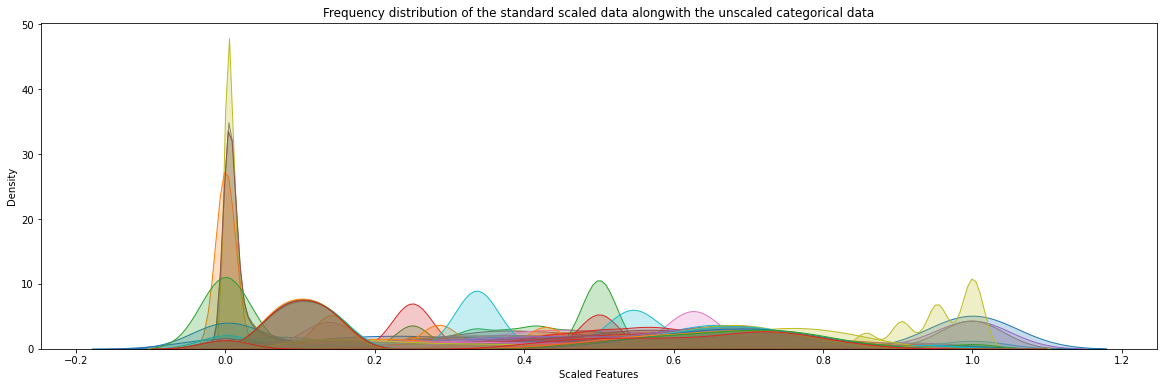

In [139]:
plt.figure(figsize=(20,6))

for nc in new_data.columns:
    sns.kdeplot(x=nc,data=new_data,shade=True)

plt.title('Frequency distribution of the standard scaled data alongwith the unscaled categorical data')
plt.xlabel('Scaled Features')
plt.show()

### PCA

In [176]:
pca = PCA(n_components=2,random_state=100)

In [177]:
data_pca = pd.DataFrame(pca.fit_transform(new_data),columns=['comp1','comp2'])
data_pca.head()

comp1     comp2
0 -2.029865 -1.254538
1 -1.946361 -1.390089
2 -1.870970 -1.339041
3  2.935902 -0.156610
4 -1.827800 -1.228408

<AxesSubplot:>

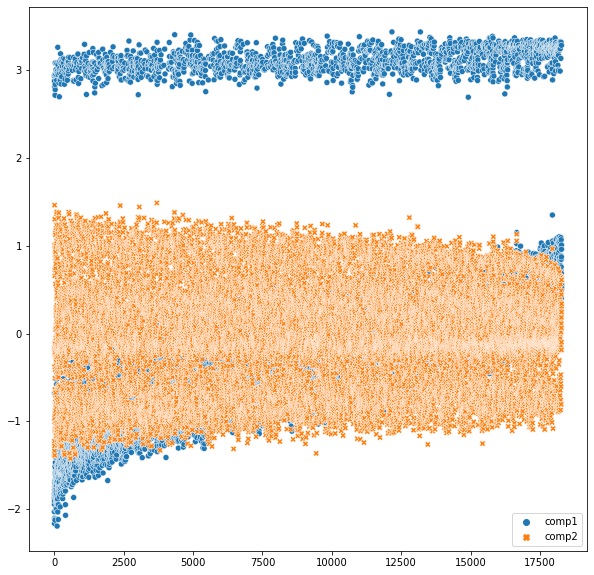

In [178]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=data_pca)

#### Elbow method

In [189]:
# to find the optimal no. of clusters

wcss=[]

for i in range(1,10):
    model = KMeans(n_clusters = i, random_state = 42).fit(data_pca)
    wcss.append(model.inertia_)
    
wcss

[33667.178250232275,
 11413.098835606519,
 6273.9155314725795,
 3831.0352547983107,
 2987.456947988466,
 2394.474642106559,
 2024.7739191130663,
 1775.8538177404237,
 1549.3255462792804]

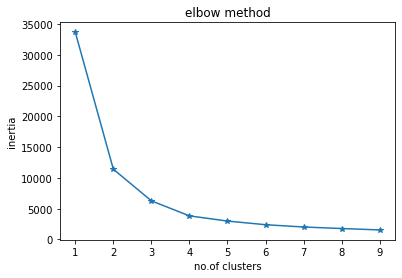

In [190]:
# plot the elbow

plt.plot(range(1,10),wcss,marker = '*')
plt.xlabel('no.of clusters')
plt.ylabel('inertia')
plt.title('elbow method')
plt.show()


-  From the graph the optimal no. of clusters can be taken as 4



#### GridSearchCV

In [237]:
from sklearn.model_selection import GridSearchCV


In [286]:
model_gs = KMeans(random_state=100)

def s2(estimator,data):
    cluster = estimator.fit_predict(data)
    return silhouette_score(data,cluster)

param = {'n_clusters':[3,4,5,6,7],
        'random_state':[x for x in np.arange(10,100,10)]}

grid = GridSearchCV(model_gs,param,scoring=s2)
grid.fit(data_pca)

GridSearchCV(estimator=KMeans(random_state=100),
             param_grid={'n_clusters': [3, 4, 5, 6, 7],
                         'random_state': [10, 20, 30, 40, 50, 60, 70, 80, 90]},
             scoring=<function s2 at 0x7fd252a5e700>)

In [287]:
grid.best_params_

{'n_clusters': 4, 'random_state': 50}

In [289]:
best_model=grid.best_estimator_
print('Silhouette score obtained from the best parameters',grid.best_params_,' is : ',s2(best_model,data_pca))

Silhouette score obtained from the best parameters {'n_clusters': 4, 'random_state': 50}  is :  0.48274322526035734


- The n_clusters obtained from GridsearchCV is 4.

#### Silhouette Analysis

For n_clusters =  2  The average silhouette_score is :  0.7248799899317208
For n_clusters =  3  The average silhouette_score is :  0.4753727299897866
For n_clusters =  4  The average silhouette_score is :  0.48272913950362145
For n_clusters =  5  The average silhouette_score is :  0.4549604039819646
For n_clusters =  6  The average silhouette_score is :  0.4271801053897996
For n_clusters =  7  The average silhouette_score is :  0.43188047764313325
For n_clusters =  8  The average silhouette_score is :  0.42541624555417673
For n_clusters =  9  The average silhouette_score is :  0.4160866407230324
For n_clusters =  10  The average silhouette_score is :  0.4160062557546257


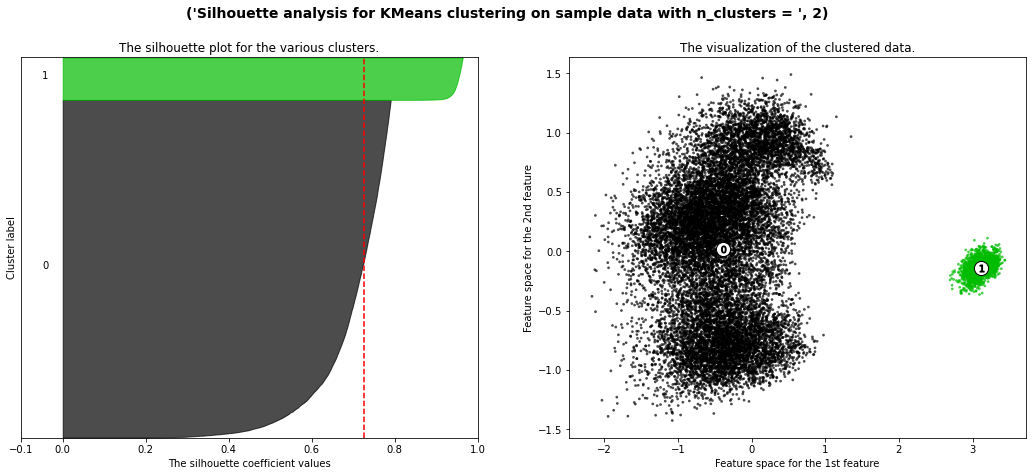

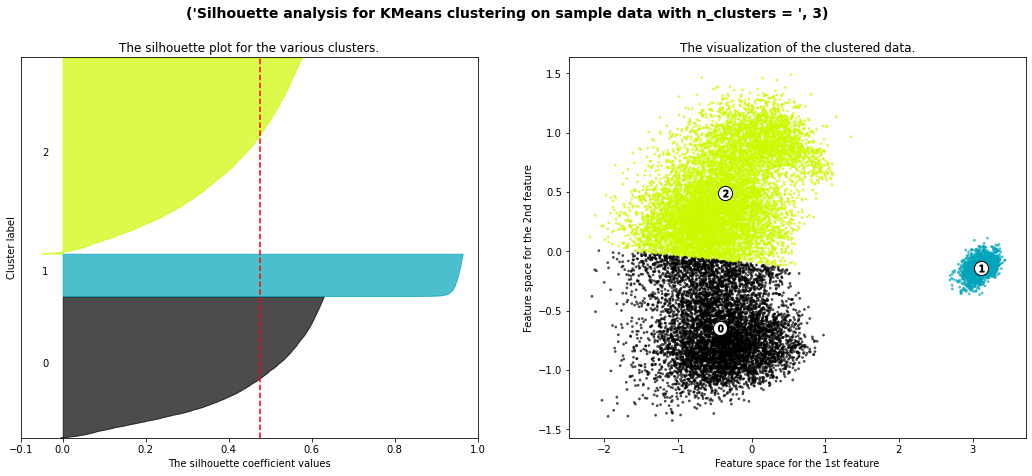

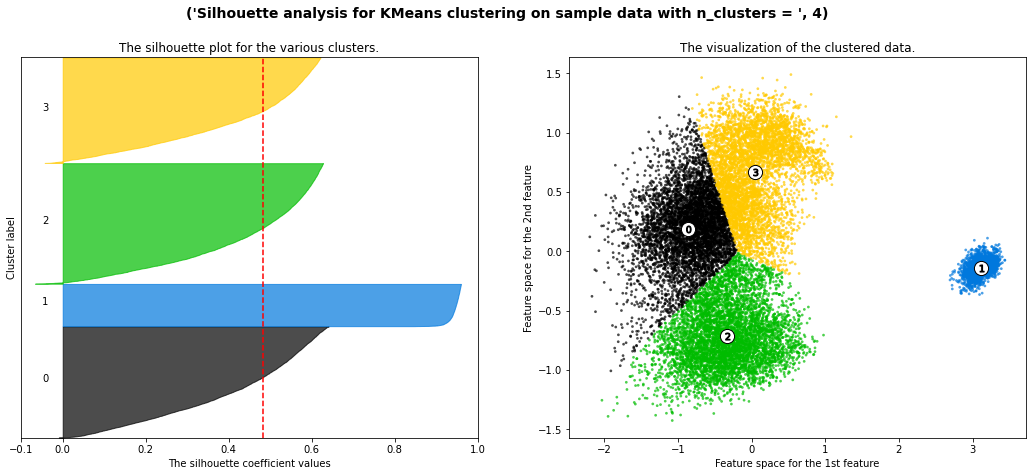

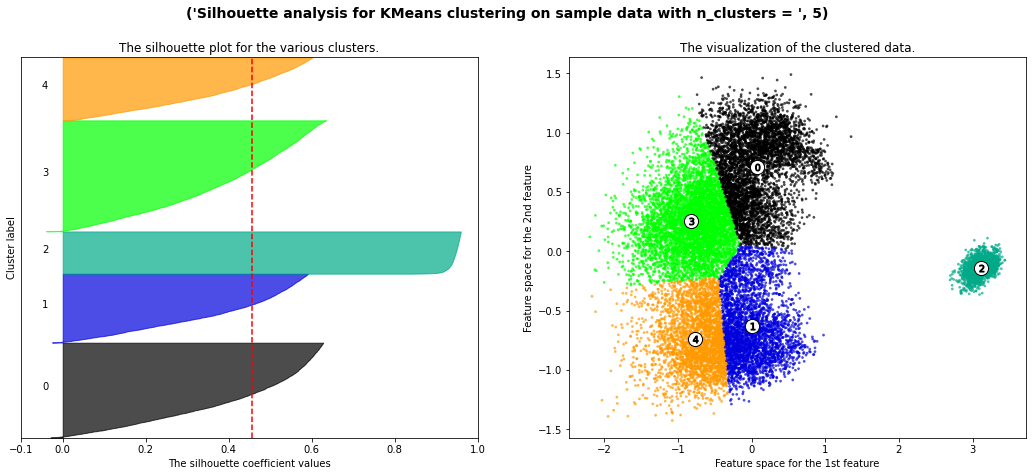

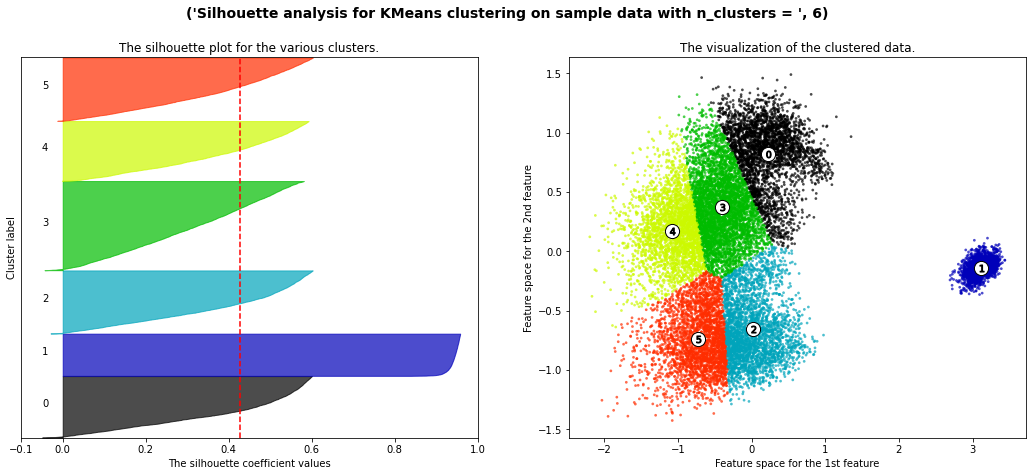

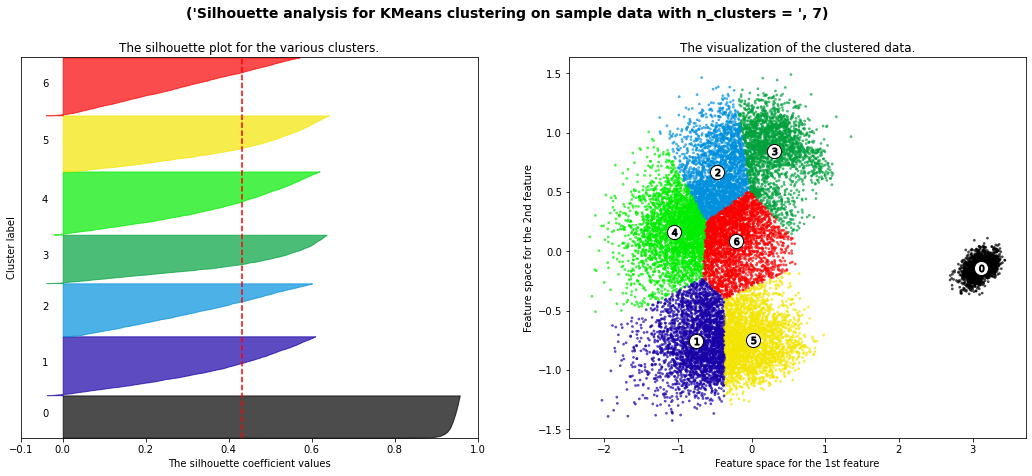

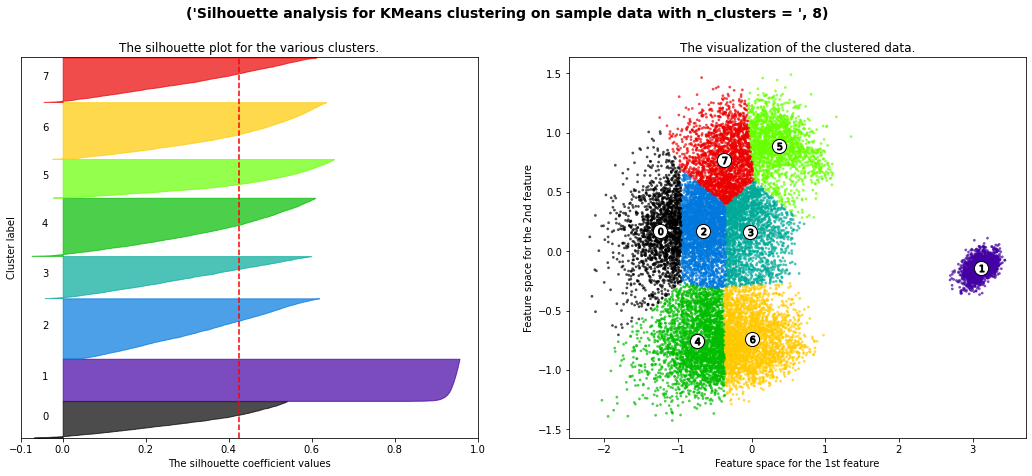

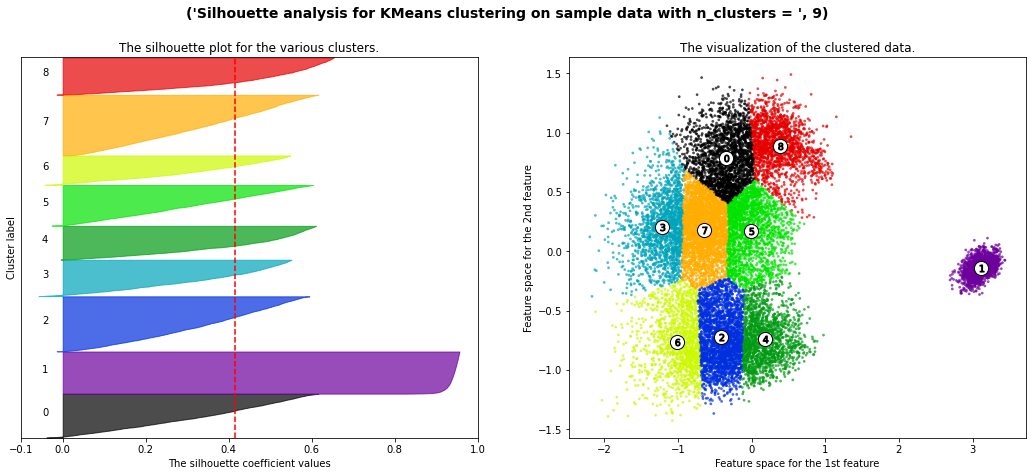

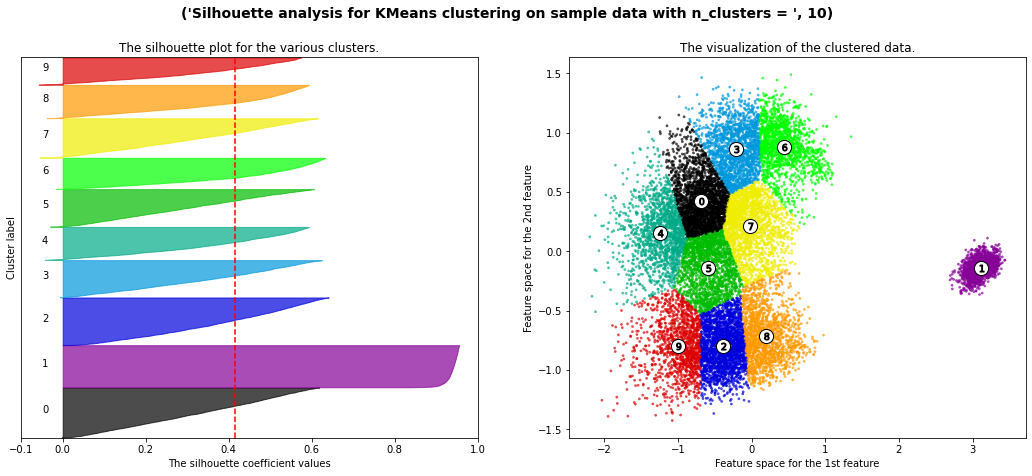

In [149]:
for n_clusters in range(2,11):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    
    ax1.set_xlim([-0.1, 1])
    
    # The (n_clusters+1)*10 is for inserting blank space between silhouette plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(data_pca)+(n_clusters+1)*10])

    # Initialize the model with n_clusters value 
    model = KMeans(n_clusters=n_clusters, random_state=100)
    clusters = model.fit_predict(data_pca)

    # The silhouette_score gives the average value for all the samples.
    
    s_score = silhouette_score(data_pca, clusters)
    print("For n_clusters = ", n_clusters," The average silhouette_score is : ", s_score)

    # Compute the silhouette scores for each sample
    sample_s_score = silhouette_samples(data_pca, clusters)

    y_lower = 10
    
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_s_score[clusters == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),0, ith_cluster_silhouette_values,alpha=0.7,facecolor=color, edgecolor=color)
                
        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=s_score, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(clusters.astype(float) / n_clusters)
    ax2.scatter(data_pca.comp1, data_pca.comp2, marker='.', s=30, lw=0, alpha=0.7, edgecolor='k',c=colors)

    # Labeling the clusters
    centers = model.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:,0], centers[:, 1], marker='o',c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data with n_clusters = " , n_clusters),fontsize=14, fontweight='bold')

plt.show()


- From the above graphs it is evident that the n-clusters = 4 gives better clusttering and it also gives better average silhouette value.

In [150]:
data_pca_CV = data_pca.copy()

In [151]:
model_KM = KMeans(n_clusters=4,random_state=50).fit(data_pca)

In [152]:
print("Silhouette score : ",silhouette_score(data_pca,model_KM.labels_))

Silhouette score :  0.48272913950362145


In [153]:
data_pca['cluster_label']= model_KM.labels_
data_pca['short_name'] =list(data.short_name)

In [154]:
data_pca.head()

comp1     comp2  cluster_label         short_name
0 -2.029865 -1.254538              2           L. Messi
1 -1.946361 -1.390088              2  Cristiano Ronaldo
2 -1.870970 -1.339041              2          Neymar Jr
3  2.935902 -0.156610              1           J. Oblak
4 -1.827800 -1.228408              2          E. Hazard

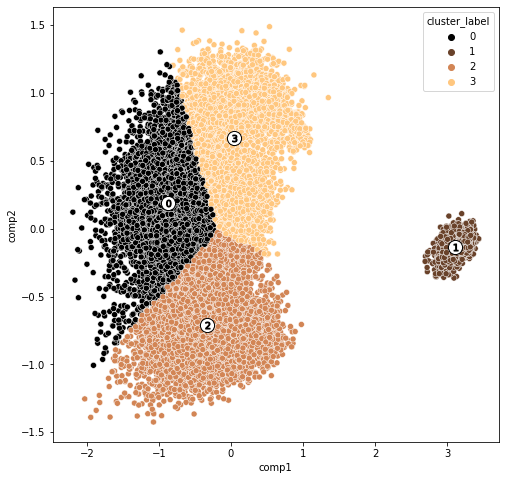

In [155]:
plt.figure(figsize=(8,8))
sns.scatterplot(x='comp1',y='comp2',hue='cluster_label',data=data_pca,palette='copper')

centers = model_KM.cluster_centers_
   
plt.scatter(centers[:,0], centers[:, 1], marker='o',c="white", alpha=1, s=200, edgecolor='k')

for i, c in enumerate(centers):
    plt.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,s=50, edgecolor='k')

#### As we have created clusters,our next step is to identify as to which group of players these clusters belong to.
#### We create a sample of 10 players each from different playing_positions belonging to the same group and plot them on the clusters.

In [166]:
# Function to generate random samples

def generate_samples(positions, n_samples):
  #  '''
   # positions = ['RW', 'ST', 'LW', 'GK', 'CAM', 'CB', 'CM', 'CDM', 'CF', 'LB', 'RB','RM', 'LM', 'LWB', 'RWB']
    #'''
    samples = original_data[original_data.player_positions.isin(positions)].sample(n_samples,random_state=100)
    print(samples.index.values)
    return samples.index.values


# Function to create the cluster plot

def sample_plot(model_KM,data_pca,sample_pca):
    
    clusters = model_KM.labels_
    centers = model_KM.cluster_centers_

    sample_clusters = model_KM.predict(sample_pca)


    predictions = pd.DataFrame(clusters, columns = ['Cluster'])
    plot_data = pd.concat([predictions, data_pca], axis = 1)

    # Generate the cluster plot
    fig, ax = plt.subplots(figsize = (14,8))

    # Color map
    cmap = cm.get_cmap('coolwarm')

    # Color the points based on assigned cluster
    for i, cluster in plot_data.groupby('Cluster'):   
        cluster.plot(ax = ax, kind = 'scatter', x = 'comp1', y = 'comp2',color = cmap((i)*1.0/(len(centers)-1)), label = ('Cluster %i'%(i)), s=30)

    # Plot centers with indicators
    for i, c in enumerate(centers):
        ax.scatter(x = c[0], y = c[1], color = 'white', edgecolors = 'black',alpha = 1, linewidth = 2, marker = 'o', s=200)
        ax.scatter(x = c[0], y = c[1], marker='$%d$'%(i), alpha = 1, s=100)

    # Plot transformed sample points 
    ax.scatter(x = sample_pca[:,0], y = sample_pca[:,1],s = 150, linewidth = 4, color = 'black', marker = 'x')

    # Set plot title
    ax.set_title("Cluster Learning on PCA-Reduced Data - Centroids Marked by Number\nTransformed Sample Data Marked by Black Cross")
    


[ 5707 12281 10973  9756  9936 16142  3026  8726 17979  4039]


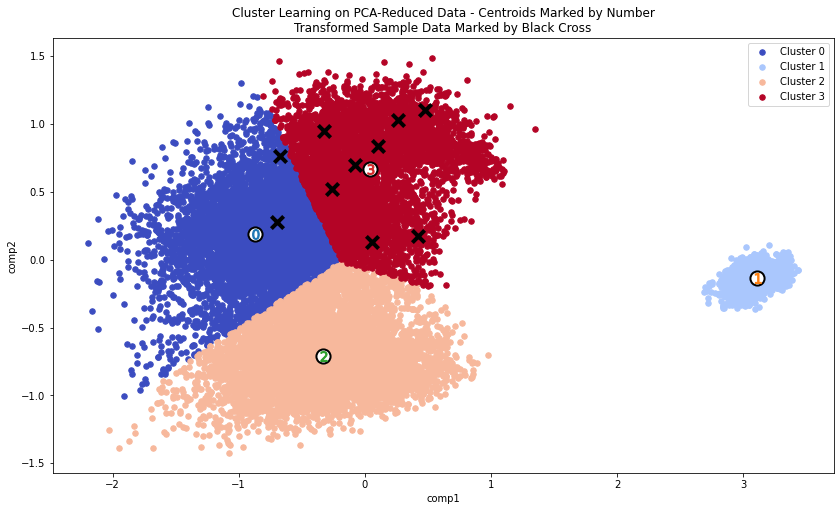

In [167]:
original_data.player_positions= original_data.player_positions.str.split(',').str[0]

sample_ids = generate_samples(['CB','LB','RB','LWB','RWB','CDM'], 10)
sample_pca = pca.transform(new_data[new_data.index.isin(sample_ids)])

sample_plot(model_KM,data_pca,sample_pca)


[15425  3431  2078 11947  9576   785  8508  4421 14879  5262]


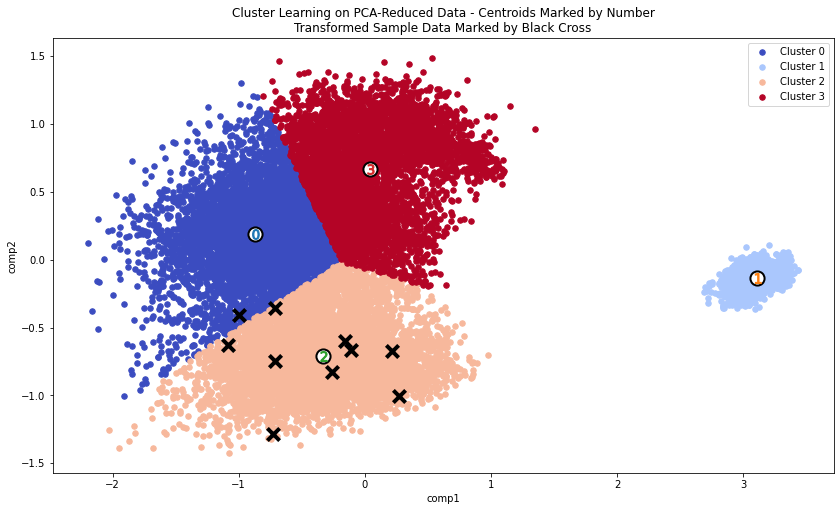

In [168]:
sample_ids = generate_samples(['ST','CF'], 10)
sample_pca = pca.transform(new_data[new_data.index.isin(sample_ids)])

sample_plot(model_KM,data_pca,sample_pca)



[ 8303  2533 11952 17454 14693  3793  1018  1946  1376  2443]


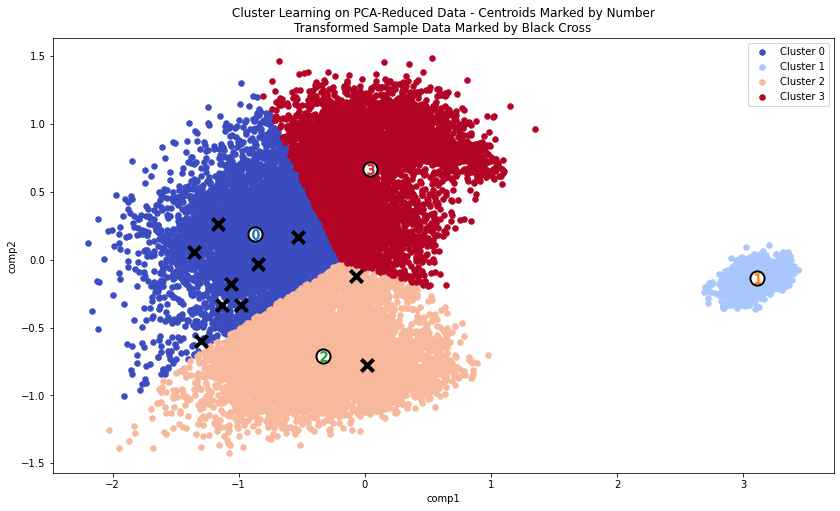

In [169]:
sample_ids = generate_samples(['CM','LM','RM','CAM'], 10)
sample_pca = pca.transform(new_data[new_data.index.isin(sample_ids)])

sample_plot(model_KM,data_pca,sample_pca)




[11140 13661   565 13466  7114 17404  2786  2718 13083  1892]


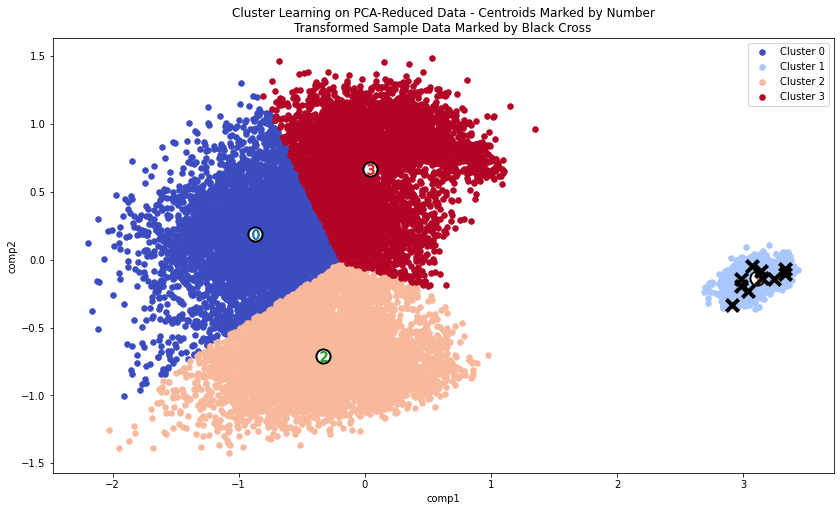

In [170]:
sample_ids = generate_samples(['GK'], 10)
sample_pca = pca.transform(new_data[new_data.index.isin(sample_ids)])

sample_plot(model_KM,data_pca,sample_pca)




#### Lets check out the cluster for the best players who has the overall>85

In [173]:
d_bestplayers = data[data.overall>85]
d_bestplayers.head()

short_name  age  height_cm  weight_kg  nationality  club  overall  \
0           L. Messi   32        170         72            5   224       94   
1  Cristiano Ronaldo   34        187         83          121   350       93   
2          Neymar Jr   27        175         68           18   462       92   
3           J. Oblak   26        188         87          133    63       91   
4          E. Hazard   28        175         74           12   505       91   

   potential  value_eur  wage_eur  player_positions  preferred_foot  \
0         94   95500000    565000                12               0   
1         93   58500000    405000                14               1   
2         92  105500000    290000                 8               1   
3         93   77500000    125000                 5               1   
4         91   90000000    470000                 8               1   

   international_reputation  weak_foot  skill_moves  work_rate  \
0                         5          4            4          7   
1                         5          4            5          1   
2                         5          5            5          2   
3                         3          3            1          8   
4                         4          4            4          2   

   release_clause_eur  player_tags  team_position  joined_year  joined_month  \
0         195800000.0           27             25         2004             7   
1          96500000.0           77             14         2018             7   
2         195200000.0           78              0         2017             8   
3         164700000.0           55              5         2014             7   
4         184500000.0           75             14         2019             7   

   joined_date  contract_valid_until  nation_present  pace  shooting  passing  \
0            1                2021.0               0  87.0      92.0     92.0   
1           10                2022.0               1  90.0      93.0     82.0   
2            3                2022.0               1  91.0      85.0     87.0   
3           16                2023.0               1  52.0       0.0      0.0   
4            1                2024.0               1  91.0      83.0     86.0   

   dribbling  defending  physic  player_traits  attacking_crossing  \
0       96.0       39.0    66.0            110                  88   
1       89.0       35.0    78.0            685                  84   
2       95.0       32.0    58.0            785                  87   
3        0.0        0.0     0.0            332                  13   
4       94.0       35.0    66.0            163                  81   

   attacking_finishing  attacking_heading_accuracy  attacking_short_passing  \
0                   95                          70                       92   
1                   94                          89                       83   
2                   87                          62                       87   
3                   11                          15                       43   
4                   84                          61                       89   

   attacking_volleys  skill_dribbling  skill_curve  skill_fk_accuracy  \
0                 88               97           93                 94   
1                 87               89           81                 76   
2                 87               96           88                 87   
3                 13               12           13                 14   
4                 83               95           83                 79   

   skill_long_passing  skill_ball_control  movement_acceleration  \
0                  92                  96                     91   
1                  77                  92                     89   
2                  81                  95                     94   
3                  40                  30                     43   
4                  83                  94                     94   


In [174]:
num_bestplayers = d_bestplayers.select_dtypes(exclude=object)
num_bestplayers.head()

age  height_cm  weight_kg  nationality  club  overall  potential  \
0   32        170         72            5   224       94         94   
1   34        187         83          121   350       93         93   
2   27        175         68           18   462       92         92   
3   26        188         87          133    63       91         93   
4   28        175         74           12   505       91         91   

   value_eur  wage_eur  player_positions  preferred_foot  \
0   95500000    565000                12               0   
1   58500000    405000                14               1   
2  105500000    290000                 8               1   
3   77500000    125000                 5               1   
4   90000000    470000                 8               1   

   international_reputation  weak_foot  skill_moves  work_rate  \
0                         5          4            4          7   
1                         5          4            5          1   
2                         5          5            5          2   
3                         3          3            1          8   
4                         4          4            4          2   

   release_clause_eur  player_tags  team_position  joined_year  joined_month  \
0         195800000.0           27             25         2004             7   
1          96500000.0           77             14         2018             7   
2         195200000.0           78              0         2017             8   
3         164700000.0           55              5         2014             7   
4         184500000.0           75             14         2019             7   

   joined_date  contract_valid_until  nation_present  pace  shooting  passing  \
0            1                2021.0               0  87.0      92.0     92.0   
1           10                2022.0               1  90.0      93.0     82.0   
2            3                2022.0               1  91.0      85.0     87.0   
3           16                2023.0               1  52.0       0.0      0.0   
4            1                2024.0               1  91.0      83.0     86.0   

   dribbling  defending  physic  player_traits  attacking_crossing  \
0       96.0       39.0    66.0            110                  88   
1       89.0       35.0    78.0            685                  84   
2       95.0       32.0    58.0            785                  87   
3        0.0        0.0     0.0            332                  13   
4       94.0       35.0    66.0            163                  81   

   attacking_finishing  attacking_heading_accuracy  attacking_short_passing  \
0                   95                          70                       92   
1                   94                          89                       83   
2                   87                          62                       87   
3                   11                          15                       43   
4                   84                          61                       89   

   attacking_volleys  skill_dribbling  skill_curve  skill_fk_accuracy  \
0                 88               97           93                 94   
1                 87               89           81                 76   
2                 87               96           88                 87   
3                 13               12           13                 14   
4                 83               95           83                 79   

   skill_long_passing  skill_ball_control  movement_acceleration  \
0                  92                  96                     91   
1                  77                  92                     89   
2                  81                  95                     94   
3                  40                  30                     43   
4                  83                  94                     94   

   movement_sprint_speed  movement_agility  movement_reactions  \
0                     84                

In [175]:
# Scaling using MinMax

data_bestplayers = pd.DataFrame(std.fit_transform(num_bestplayers),columns=list(num_bestplayers.columns))
data_bestplayers.head()
                                

age  height_cm  weight_kg  nationality      club  overall  potential  \
0  0.857143   0.194444   0.351351     0.000000  0.286667    1.000   0.888889   
1  1.000000   0.666667   0.648649     0.773333  0.496667    0.875   0.777778   
2  0.500000   0.333333   0.243243     0.086667  0.683333    0.750   0.666667   
3  0.428571   0.694444   0.756757     0.853333  0.018333    0.625   0.777778   
4  0.571429   0.333333   0.405405     0.046667  0.755000    0.625   0.555556   

   value_eur  wage_eur  player_positions  preferred_foot  \
0   0.885057  1.000000          0.857143             0.0   
1   0.459770  0.677419          1.000000             1.0   
2   1.000000  0.445565          0.571429             1.0   
3   0.678161  0.112903          0.357143             1.0   
4   0.821839  0.808468          0.571429             1.0   

   international_reputation  weak_foot  skill_moves  work_rate  \
0                      1.00       0.75         0.75      0.875   
1                      1.00       0.75         1.00      0.125   
2                      1.00       1.00         1.00      0.250   
3                      0.50       0.50         0.00      1.000   
4                      0.75       0.75         0.75      0.250   

   release_clause_eur  player_tags  team_position  joined_year  joined_month  \
0            1.000000       0.2500       0.892857     0.000000         0.750   
1            0.385520       0.8750       0.500000     0.933333         0.750   
2            0.996287       0.8875       0.000000     0.866667         0.875   
3            0.807550       0.6000       0.178571     0.666667         0.750   
4            0.930074       0.8500       0.500000     1.000000         0.750   

   joined_date  contract_valid_until  nation_present      pace  shooting  \
0     0.000000                  0.25             0.0  0.836364  0.989247   
1     0.300000                  0.50             1.0  0.890909  1.000000   
2     0.066667                  0.50             1.0  0.909091  0.913978   
3     0.500000                  0.75             1.0  0.200000  0.000000   
4     0.000000                  1.00             1.0  0.909091  0.892473   

    passing  dribbling  defending    physic  player_traits  \
0  1.000000   1.000000   0.433333  0.741573       0.119826   
1  0.891304   0.927083   0.388889  0.876404       0.746187   
2  0.945652   0.989583   0.355556  0.651685       0.855120   
3  0.000000   0.000000   0.000000  0.000000       0.361656   
4  0.934783   0.979167   0.388889  0.741573       0.177560   

   attacking_crossing  attacking_finishing  attacking_heading_accuracy  \
0            0.939024             1.000000                    0.731707   
1            0.890244             0.988235                    0.963415   
2            0.926829             0.905882                    0.634146   
3            0.024390             0.011765                    0.060976   
4            0.853659             0.870588                    0.621951   

   attacking_short_passing  attacking_volleys  skill_dribbling  skill_curve  \
0                 1.000000           0.974684         1.000000     1.000000   
1                 0.854839           0.962025         0.908046     0.853659   
2                 0.919355           0.962025         0.988506     0.939024   
3                 0.209677           0.025316         0.022989     0.024390   
4                 0.951613           0.911392         0.977011     0.878049   

   skill_fk_accuracy  skill_long_passing  skill_ball_control  \
0           1.000000            1.000000              1.0000   
1           0.785714            0.741379              0.9500   
2           0.916667            0.810345              0.9875   
3           0.047619            0.103448              0.1750   
4           0.821429            0.844828              0.9750   

   movement_acceleration  movement_sprint_speed  movement_agility  \
0               0.913793               0.803279          0.949153   
1              

In [294]:
# PCA
pca = PCA(n_components=2,random_state=100)

pca_bestplayers = pd.DataFrame(pca.fit_transform(data_bestplayers),columns=['comp1','comp2'])

# Finding the optimal k and the best silhouette score using Grid Search

model_base = KMeans()

def s2(estimator,data):
    cluster = estimator.fit_predict(data)
    return silhouette_score(data,cluster)

param = {'n_clusters':[3,4,5,6,7],
        'random_state':[x for x in np.arange(10,110,10)]}

grid = GridSearchCV(model_base,param,scoring=s2,n_jobs=-1)
grid.fit(pca_bestplayers)

best_model = grid.best_estimator_
print('The Silhouette score for the best parameter ',grid.best_params_,' is : ',s2(best_model,pca_bestplayers))

The Silhouette score for the best parameter  {'n_clusters': 3, 'random_state': 10}  is :  0.6775030234856596


[301.21800076280834, 73.94365760064356, 18.584251548853217, 9.339850867953126, 6.896945125120269, 5.2122323223866, 3.677704724563574, 3.2091949043793426, 2.6839375404433565]


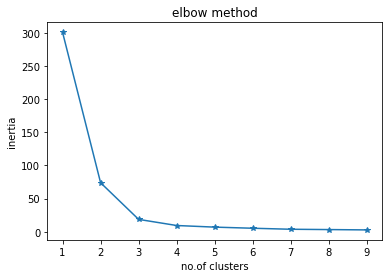

In [299]:
# finding and plotting the k
wcss=[]

for i in range(1,10):
    model = KMeans(n_clusters = i, random_state = 100).fit(pca_bestplayers)
    wcss.append(model.inertia_)
    
print(wcss)


# plot the elbow

plt.plot(range(1,10),wcss,marker = '*')
plt.xlabel('no.of clusters')
plt.ylabel('inertia')
plt.title('elbow method')
plt.show()

From both the methods it is confirmed that the optimal k is 3 with a silhouette score of 0.6775

In [301]:
best_model.fit(pca_bestplayers)

KMeans(n_clusters=3, random_state=10)

In [303]:
pca_bestplayers['cluster_labels']=best_model.labels_
pca_bestplayers['short_names']=d_bestplayers.short_name
pca_bestplayers.head()

comp1     comp2  cluster_labels        short_names
0 -1.319864 -1.330781               0           L. Messi
1 -1.136970 -1.202847               0  Cristiano Ronaldo
2 -1.125774 -1.486714               0          Neymar Jr
3  4.217718 -0.523449               1           J. Oblak
4 -1.111252 -1.313212               0          E. Hazard

<Figure size 1296x2160 with 0 Axes>

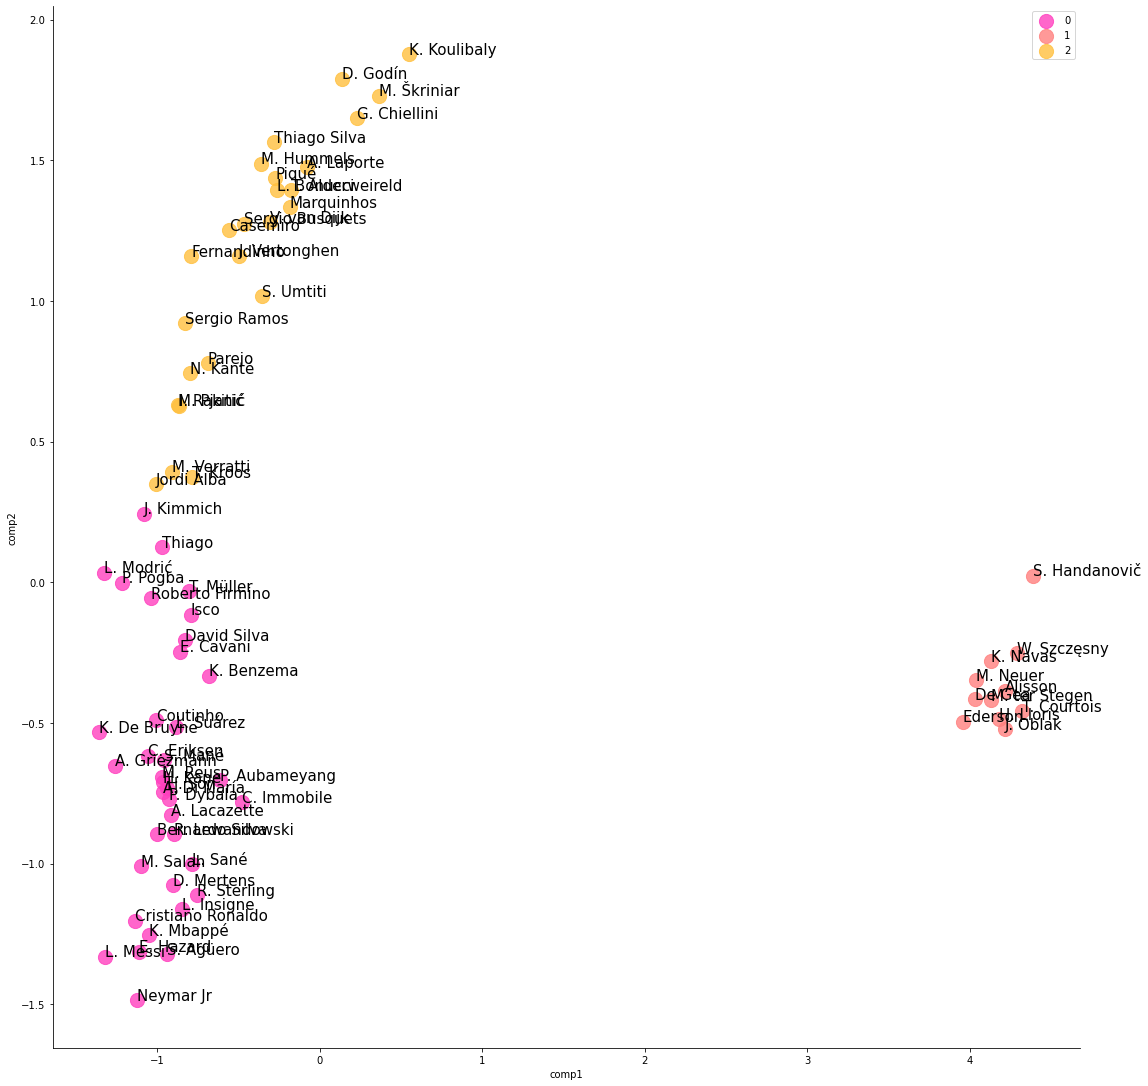

In [340]:
plt.figure(figsize=(18,30))
sns.lmplot(x='comp1',y='comp2',hue='cluster_labels',data=pca_bestplayers,palette='spring',fit_reg=False,size=15,scatter_kws={'s':200},legend=False)

names = []
for x,y,n in zip(pca_bestplayers.comp1,pca_bestplayers.comp2,pca_bestplayers.short_names):
    names.append(plt.text(x,y,n,fontsize=15))
    
plt.legend(loc= 'upper right')
plt.yscale('linear')

